In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import math
# import xlrd3

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [3]:
file_names_outdoor = np.array(['outdoor_16-2.csv', 'outdoor_8-1.csv', 'outdoor_8-2.csv', 'outdoor_8-4.csv', 'outdoor_4-2.csv', 'outdoor_4-3.csv'])
file_names_outdoor = np.char.add("outdoor/", file_names_outdoor)

In [4]:
def make_data_outdoor(file_path):
    return pd.read_csv(
        file_path,
        sep=';',                # Ensure correct delimiter
        decimal=',',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

In [5]:
data_array_outdoor = []
i = 0
for name in file_names_outdoor:
    data_array_outdoor.append(make_data_outdoor(name))
    i += 1
data_array_outdoor[0].head()
N = len(data_array_outdoor)

m = 20.24124111641165 * U + -2.9186518521095843


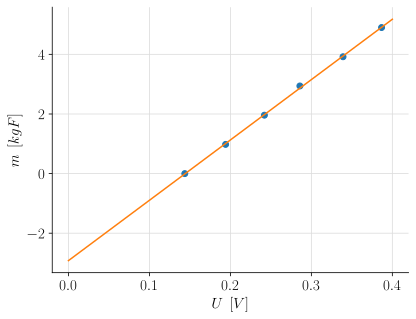

In [6]:
# калибровка тензодатчика
V = np.array([0, 1, 2, 3, 4, 5])
m = V * 980
U = np.array([143.7, 194.1, 242, 285.8, 339.1, 386.7])

fit_calibr = np.polyfit(U / 1000, m / 1000, 1)
x = np.array([0, 0.4])
y = fit_calibr[0] * x + fit_calibr[1]
print("m =", fit_calibr[0], "* U +", fit_calibr[1])

# график калибровки
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(U / 1000, m / 1000, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$m\:\:[kgF]$')
plt.grid(color='gainsboro')

p = 2.1327772720647955 * U + -4.255941865177047


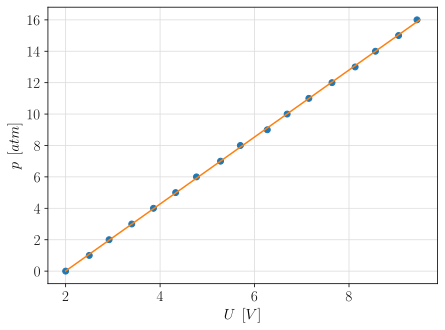

In [7]:
# калибровка давления
p = np.arange(0, 17, 1)
U = np.array([2, 2.50, 2.92, 3.40, 3.86, 4.33, 4.77, 5.28, 5.70, 6.27, 6.69, 7.15, 7.64, 8.13, 8.56, 9.05, 9.44])

fit_p_calibr = np.polyfit(U, p, 1)
x = np.array([2, 9.5])
y = fit_p_calibr[0] * x + fit_p_calibr[1]
print("p =", fit_p_calibr[0], "* U +", fit_p_calibr[1])

plt.plot(U, p, 'o')
plt.plot(x, y)

plt.xlabel(r'$U\:\:[V]$')
plt.ylabel(r'$p\:\:[atm]$')
plt.grid(color='gainsboro')

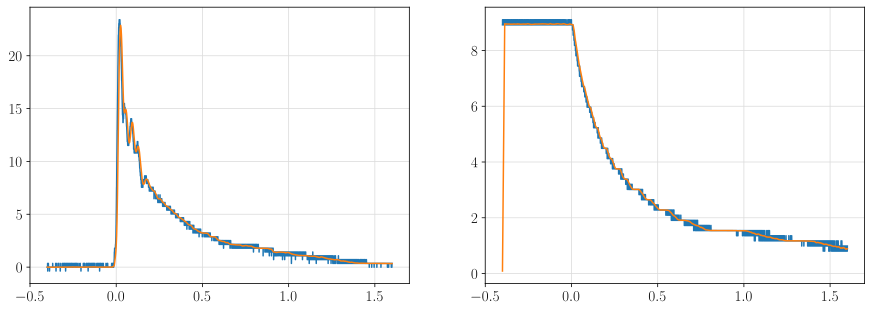

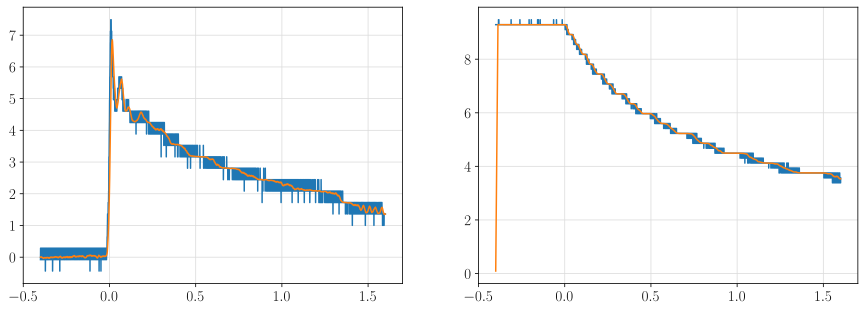

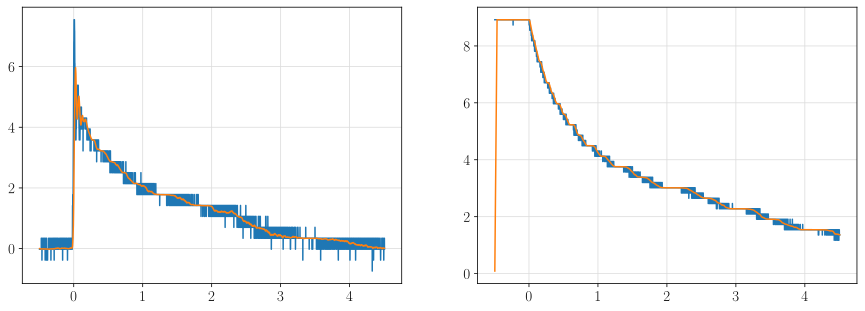

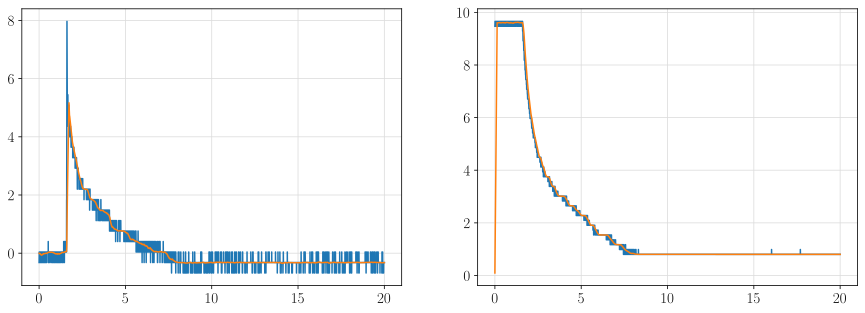

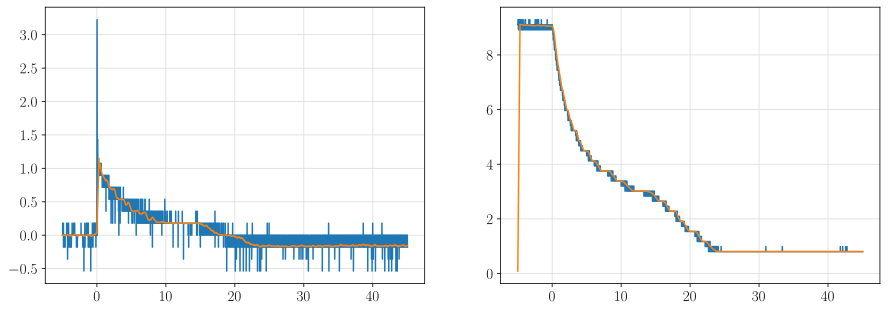

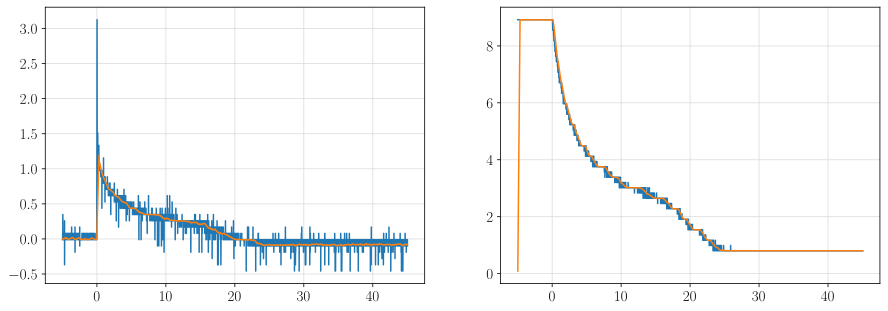

In [8]:
from scipy.signal import lfilter
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
# plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [15, 5]

time_data = []
F_exp = [] # exp - raw experimental data
p_exp = []

F_filtered_data = []
p_filtered_data = []

for i in range(N):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    time = np.array(data_array_outdoor[i].iloc[:, 0])
    time_data.append(time)
    
    U_F = np.array(data_array_outdoor[i].iloc[:, 1])
    if i == 5:
        U_F = U_F / 1000
    
    U_p = np.array(data_array_outdoor[i].iloc[:, 2])
    p = fit_p_calibr[0] * U_p + fit_p_calibr[1] + 1
    p_exp.append(p)

    ax2.plot(time, p)
    
    n = 100  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    n2 = 100
    b2 = [1.0 / n2] * n2
    a = 1
    U_F_filtered = lfilter(b, a, U_F)
    p_filtered = lfilter(b2, a, p)
    p_filtered_data.append(p_filtered)

    U_F_0 = U_F_filtered[500:1000].mean()
    F = fit_calibr[0] * (U_F - U_F_0)
    F_exp.append(F)

    F_filtered = lfilter(b, a, F)
    F_filtered_data.append(F_filtered)

    ax1.plot(time, F)
    ax1.plot(time, F_filtered)
    ax2.plot(time, p_filtered)
    
    ax1.grid(color='gainsboro')
    ax2.grid(color='gainsboro')


[array([1.97015578, 0.7533894 ]), array([0.66579694, 0.0120945 ]), array([0.6313468 , 0.02294003]), array([0.60154892, 0.180916  ]), array([ 0.17722987, -0.20752241]), array([ 0.14540079, -0.03139779])]


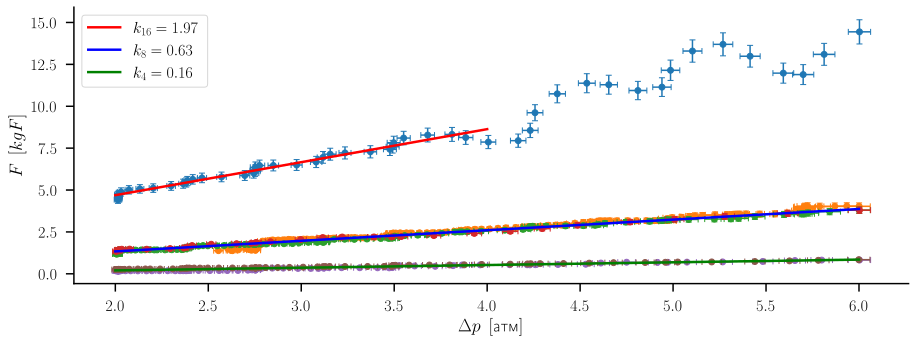

In [9]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', length=8, width=1.5, direction='out', pad=8)

fit_pF = []
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i in range(N):
    p_start = 7 - 1
    p_end = 3 - 1

    p = p_filtered_data[i][500:] - 1
    F = F_filtered_data[i][500:]
    start = np.abs(p - p_start).argmin()
    end = np.abs(p - p_end).argmin()
    step_1 = 50
    # plt.plot(p[start:end:step_1], F[start:end:step_1], 'o') # , linewidth=1, linestyle='--'
    plt.errorbar(p[start:end:step_1], F[start:end:step_1], xerr=p[start:end:step_1]*0.01 ,yerr=F[start:end:step_1] * 0.05, fmt='o', capsize=3, zorder=i, color=colors[i % len(colors)])
    # plt.plot(p[start:end][800:], F[start:end][800:], linewidth=1, linestyle='--')
    if i == 0:
        fit_pF.append(np.polyfit(p[start:end][800:], F[start:end][800:], 1))
    elif i == 1:
        fit_pF.append(np.polyfit(p[start:end][:5500], F[start:end][:5500], 1))
    else:
        fit_pF.append(np.polyfit(p[start:end], F[start:end], 1))

print(fit_pF)

x = np.array([3 - 1, 5 - 1])
k_16 = fit_pF[0][0]
b_16 = fit_pF[0][1]
y_16 = k_16 * x + b_16
plt.plot(x, y_16, linewidth=2.5, label=r"$k_{}={}$".format({16}, round(k_16, 2)), zorder=i + 1, color='red')

x = np.array([3 - 1, 7 - 1])
k_8 = np.array([fit_pF[1][0], fit_pF[2][0], fit_pF[3][0]]).mean()
b_8 = np.array([fit_pF[1][1], fit_pF[2][1], fit_pF[3][1]]).mean()
k_4 = np.array([fit_pF[4][0], fit_pF[5][0]]).mean()
b_4 = np.array([fit_pF[4][1], fit_pF[5][1]]).mean()
y_8 = k_8 * x + b_8
y_4 = k_4 * x + b_4
plt.plot(x, y_8, linewidth=2.5, label=r"$k_{}={}$".format({8}, round(k_8, 2)), zorder=i + 2, color='blue')
plt.plot(x, y_4, linewidth=2.5, label=r"$k_{}={}$".format({4}, round(k_4, 2)), zorder=i + 3, color='green')

plt.xlabel('$\\Delta p\\:\\: [\\text{атм}]$')
plt.ylabel(r'$F\:\:[kgF]$')
plt.legend()

# plt.grid(color='gainsboro')

# plt.savefig("F_vs_p.pdf", bbox_inches='tight')
# plt.savefig("F_vs_p.svg", bbox_inches='tight')

In [ ]:
S_16 = np.pi * (0.016)**2 / 4
S_8 = np.pi * (0.008)**2 / 4
S_4 = np.pi * (0.004)**2 / 4

In [5]:
mu_16 = (k_16 * 9.8 / 1e5 / (2 * S_16))**0.5
mu_16

NameError: name 'k_16' is not defined

In [13]:
mu_8 = (k_8 * 9.8 / 1e5 / (2 * S_8))**0.5
mu_8

0.7854703946956497

In [14]:
mu_4 = (k_4 * 9.8 / 1e5 / (2 * S_4))**0.5
mu_4

0.7931054448974039

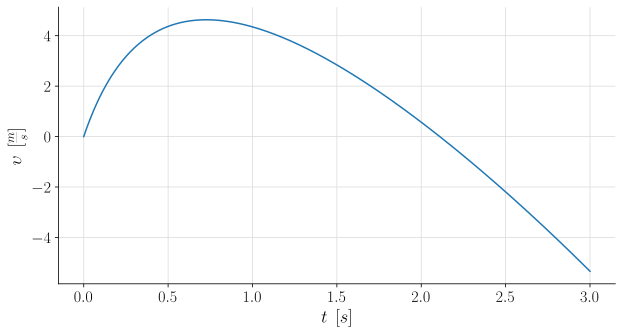

In [15]:
# моделирование уравнения Мещерского
from scipy.integrate import quad

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, mu, alpha, S):
    return 2 * mu**2 * S * (p(t, alpha) - p_a) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.4
S = S_8

N_step = 500
time = np.linspace(0, tau, num=N_step)
u = np.zeros(N_step)
for i in range(N_step):
    u[i], error = quad(du_dt, 0, time[i], args=(mu, alpha, S))

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

5.611647231599791


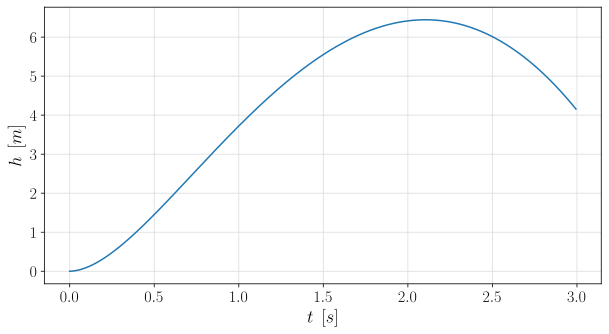

In [16]:
x = np.zeros(N_step - 1)
for i in range(1, N_step - 1):
    x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

plt.plot(time[:N_step - 1], x)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$h\:\:[m]$')
plt.grid(color='gainsboro')

print(x[-1] + u[-1]**2 / (2 * g))

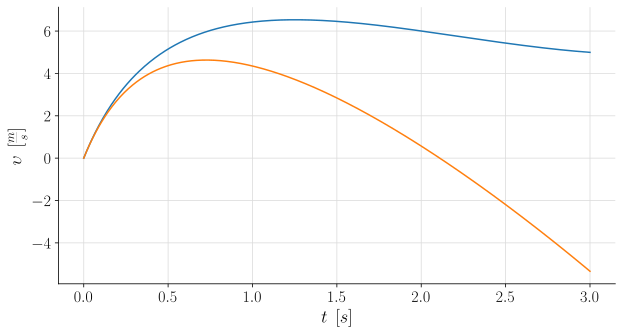

In [17]:
# моделирование уравнения Мещерского с силой сопротивления
from scipy.integrate import solve_ivp

p_a = 1e5
p_0 = 10 * 1e5
m_rocket = 0.1
# V_0 = 0.0002
V_rocket = 0.0022
rho = 1000
tau = 3
g = 9.8
k = 1 / 2 * 1.25 * np.pi * (0.085 / 2)**2 * 0.3

def V(t):
    # коэффициенты из proc2
    a3 = 1.4925734527648119e-05
    a2 = -0.00016820662956579035
    a1 = 0.0008543202811112441
    a0 = 0.000415451133468293
    return a3 * t**3 + a2 * t**2 + a1 * t + a0

V_0 = V(0)

def p(t, alpha):
    return p_0 * (V_0 / V(t))**alpha

def du_dt(t, u, mu, alpha, S):
    return (2 * mu**2 * S * (p(t, alpha) - p_a) - k * u**2) / (m_rocket + rho * (V_rocket - V(t))) - g

mu = mu_8
alpha = 1.2
S = S_8

# Начальные условия
t0 = 0
u0 = 0
N_step = 500

t_span = (t0, 3)
t_eval = np.linspace(t0, 3, N_step)

solution = solve_ivp(du_dt, t_span, [u0], args=(mu, alpha, S), t_eval=t_eval)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(solution.t, solution.y[0])
plt.plot(time, u)

plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
plt.grid(color='gainsboro')

In [18]:
def make_data_8_4(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=1              # Skip non-data header rows
    )

data_8_4 = make_data_8_4('pV_8-4_1.csv')
time_exp_8_4 = np.array(data_8_4.iloc[:, 0])
U_p_exp_8_4 = np.array(data_8_4.iloc[:, 2])
p_exp_8_4 = fit_p_calibr[0] * (U_p_exp_8_4 - 1.76)
p_exp_8_4[1000:2000].mean()

6.487975669698504

In [187]:
mu_8

0.7854703946956497

0.0005 7.853981633974482e-07
0.0005222222222222222 7.853981633974482e-07
0.0005444444444444444 7.853981633974482e-07
0.0005666666666666667 7.853981633974482e-07
0.0005888888888888889 7.853981633974482e-07
0.0006111111111111111 7.853981633974482e-07
0.0006333333333333333 7.853981633974482e-07
0.0006555555555555555 7.853981633974482e-07
0.0006777777777777778 7.853981633974482e-07
0.0007 7.853981633974482e-07
0.0005 3.560471674068432e-05
0.0005222222222222222 3.560471674068432e-05
0.0005444444444444444 3.560471674068432e-05
0.0005666666666666667 3.560471674068432e-05
0.0005888888888888889 3.560471674068432e-05
0.0006111111111111111 3.560471674068432e-05
0.0006333333333333333 3.560471674068432e-05
0.0006555555555555555 3.560471674068432e-05
0.0006777777777777778 3.560471674068432e-05
0.0007 3.560471674068432e-05
0.0005 7.042403531797119e-05
0.0005222222222222222 7.042403531797119e-05
0.0005444444444444444 7.042403531797119e-05
0.0005666666666666667 7.042403531797119e-05
0.00058888888888888

/tmp/ipykernel_59383/1776814748.py:41: RuntimeWarning: invalid value encountered in sqrt
  return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5


0.0006333333333333333 0.0001748819910498318
0.0006555555555555555 0.0001748819910498318
0.0006777777777777778 0.0001748819910498318
0.0007 0.0001748819910498318
0.0005 0.00020970130962711867
0.0005222222222222222 0.00020970130962711867
0.0005444444444444444 0.00020970130962711867
0.0005666666666666667 0.00020970130962711867
0.0005888888888888889 0.00020970130962711867
0.0006111111111111111 0.00020970130962711867
0.0006333333333333333 0.00020970130962711867
0.0006555555555555555 0.00020970130962711867
0.0006777777777777778 0.00020970130962711867
0.0007 0.00020970130962711867
0.0005 0.00024452062820440557
0.0005222222222222222 0.00024452062820440557
0.0005444444444444444 0.00024452062820440557
0.0005666666666666667 0.00024452062820440557
0.0005888888888888889 0.00024452062820440557
0.0006111111111111111 0.00024452062820440557
0.0006333333333333333 0.00024452062820440557
0.0006555555555555555 0.00024452062820440557
0.0006777777777777778 0.00024452062820440557
0.0007 0.00024452062820440557

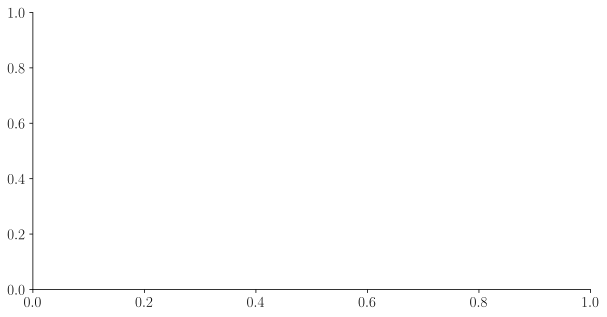

In [13]:
# моделирование уравнения Мещерского
from scipy.integrate import quad
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

p_a = 1e5
p_0 = 11 * 1e5 #(p_exp_8_4[1000:2000].mean() + 1) * 1e5
m_rocket = 0.2
# V_0 = 0.0002
V_rocket = 0.0012 #0.0022
rho = 1000
tau = 5
g = 9.8
alpha = 1.1
N_step = 7000
S = S_16
# mu = 0.8
# Cd = 0.6
# mu = 0.8 # norm? sbivka
# Cd = 0.38

mu = 0.71 # sbivka t1 ????
Cd = 0.05

# mu = 0.71
# Cd = 0.05
# mu = 0.72
# Cd = 0.2



# V_0 = V_rocket / 2 #0.000415451133468293
V_start_0 = np.linspace(0.0005, 0.0007, 10)
S_array_0 = np.linspace(np.pi * (0.001)**2 / 4, np.pi * (0.02)**2 / 4, 10)
VV_start, SS_array = np.meshgrid(V_start_0, S_array_0)
VS_array = np.column_stack((VV_start.ravel(), SS_array.ravel()))
# print(VS_array)
# V_start = np.linspace(0.00041, 0.00045, 20)

def dp_dt(t, p, alpha, mu, S, V_0):
    return -alpha * p / (V_0 * (p_0 / p)**(1 / alpha)) * mu * S * (2 * (p - p_a) / rho)**0.5

# Начальные условия
t0 = 0
p0 = p_0

t_span = (t0, tau)
t_eval = np.linspace(t0, tau, N_step)

plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

p_array = []
time_array = []

for V_0, S in VS_array:
    print(V_0, S)
    solution = solve_ivp(dp_dt, t_span, [p0], args=(alpha, mu, S, V_0), t_eval=t_eval)
        
    # plt.plot(solution.t, solution.y[0] / 1e5)
    p_array.append(interp1d(solution.t, solution.y[0], kind='linear'))
    time_array.append(solution.t)
    # start_8_4 = 3200
    # plt.plot(time_exp_8_4[start_8_4:] - time_exp_8_4[start_8_4], p_exp_8_4[start_8_4:] + 1)
        
    # plt.xlabel(r'$t\:\:[s]$')
    # plt.ylabel(r'$p\:\:[atm]$')
    # plt.grid(color='gainsboro')

873447.6772674378
880794.0733335002
887676.9865047107
894139.1240821457
900218.08077803
905947.0845273831
911355.6150052189
916469.919557762
921313.4459170602
925907.2069918476
419920.9447478276
440499.19886776456
461113.71696741425
481873.18622325634
502659.2860170556
523573.9179379601
544491.9903376643
565645.2364737124
586785.1750131921
607885.9911048614
419957.0532512733
440489.90135487955
461054.03098878695
481932.0173346222
502559.19894503604
523714.94646297605
544404.8356172614
565668.0593145359
586990.7916701528
607686.3048986923
419795.58962005965
440520.6979402044
460871.96929889405
481890.3023200594
502846.2516149783
523646.12538540974
544271.5555265503
565503.49015222
586508.9487244354
608111.745853115
420019.7742399353
440211.1932693947
461117.80307382904
481853.7979357252
503160.5485340854
523197.0951722878
544838.6967609796
566119.4915401515
586872.8734455731
608173.0085931353
419984.4854268761
440163.3341998024
461018.3713941935
481430.51426244236
502419.7532321902
5241

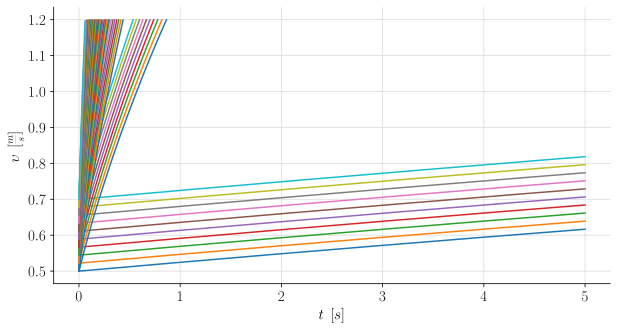

In [14]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r'\usepackage[utf8x]{inputenc}')
plt.rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex',preamble=r'\usepackage{amsmath}')
plt.rc('font', size=15)
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

i = 0
u_array = []
time_array_2 = []
stop_solution_array = []
for V_0, S in VS_array:
    p = p_array[i]
    def V(t, alpha, V_0):
        return V_0 * (p_0 / p(t))**(1 / alpha)
    
    # plt.plot(solution.t, V(solution.t, alpha, V_0))
    stop = np.abs(np.array(V(solution.t, alpha, V_0)) - V_rocket).argmin()
    time = np.array(time_array[i])
    i += 1
    print(p(time[stop]))
    
    k = 1 / 2 * 1.25 * np.pi * (0.080 / 2)**2 * Cd
    
    def du_dt(t, u, mu, alpha, S, V_0):
        if t < time[stop]:
            return (2 * mu**2 * S * (p(t) - p_a) - k * u**2) / (m_rocket + rho * (V_rocket - V(t, alpha, V_0))) - g
        elif t >= time[stop]:
            return -g - k * u**2 / m_rocket
    
    # Начальные условия
    t0 = 0
    u0 = 0
    
    t_span = (t0, tau)
    t_eval = np.linspace(t0, tau, N_step)
    
    solution = solve_ivp(du_dt, t_span, [u0], args=(mu, alpha, S, V_0), t_eval=t_eval, rtol=1e-6, atol=1e-9)

    u_array.append(solution.y[0])
    time_array_2.append(solution.t)
    stop_solution = np.abs(solution.y[0][100:]).argmin()
    stop_solution_array.append(stop_solution)
    # plt.plot(np.array(solution.t)[:stop_solution], solution.y[0][:stop_solution]) # [:stop_solution]
    # print(solution.t[stop_solution])
    plt.plot(np.array(solution.t)[:stop], V(solution.t, alpha, V_0)[:stop] * 1000)
    
    T_8 = np.load('T.npy')
    Vs_8 = np.load('Vs.npy')
    # plt.plot(T_8, Vs_8 / 1e3)
    
plt.xlabel(r'$t\:\:[s]$')
plt.ylabel(r'$\upsilon\:\:[\frac{m}{s}]$')
# plt.ylabel(r'$V\:\:[l]$')
# plt.legend(V_start * 1e6)
plt.grid(color='gainsboro')

In [254]:
# cd -

In [255]:
def make_data_combined(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=0             # Skip non-data header rows
    )
# data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t1/out/combined.csv')
data_comb_1 = make_data_combined('../experiments/rocket/nov_28/t1/out/combined.csv')
# data_comb_2 = make_data_combined('../experiments/rocket/nov_28/t2/out/combined.csv')
# data_comb_1.head()
time_1 = data_comb_1["t"].to_numpy()
track_z_1 = data_comb_1["track_z"].to_numpy()

# time_2 = data_comb_2["t"].to_numpy()
# track_z_2 = data_comb_2["track_z"].to_numpy()
# plt.plot(time_1, track_z_1)

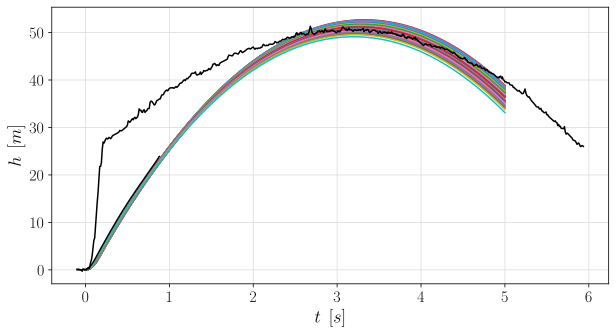

In [257]:
h_max = np.zeros(len(V_start))
flag_plot = 0
for j in range(len(V_start)):
    time = time_array_2[j]
    # x = np.zeros(len(time) - 1)
    u = u_array[j]
    u_interp = interp1d(time, u, kind='linear')
    def dx_dt(t, x):
        return u_interp(t)
    # for i in range(1, len(u) - 1):
    #     x[i] = x[i - 1] + (u[i + 1] + u[i]) / 2 * (time[i + 1] - time[i])

    # Начальные условия
    t0 = 0
    x0 = 0
    
    # t_span = (t0, tau)
    # t_eval = np.linspace(t0, tau, N_step)
    t_span = (time.min(), time.max())
    t_eval = np.linspace(time.min(), time.max(), N_step)
    
    solution_x = solve_ivp(dx_dt, t_span, [x0], t_eval=t_eval, rtol=1e-6, atol=1e-9)

    h_max[j] = np.max(solution_x.y[0])
    # print(h_max[j])
    if flag_plot == 0:
        stop_solution = stop_solution_array[j]
        plt.plot(solution_x.t[:], solution_x.y[0][:])

if flag_plot == 1:
    plt.plot(V_start * 1e3, h_max, 'o')
    plt.xlabel(r'$V_0\:\:[l]$')
    plt.ylabel(r'$h_{max}\:\:[m]$')

if flag_plot == 0:
    plt.xlabel(r'$t\:\:[s]$')
    plt.ylabel(r'$h\:\:[m]$')
plt.grid(color='gainsboro')
# plt.plot(time_1+0.01, track_z_1, c="black")
# plt.plot(time_1+0.01, data_comb_1["h"], c="black")
plt.plot(time_1, track_z_1, c="black")
plt.plot(time_1, data_comb_1["h"], c="black")
# plt.xlim(-0.1, 1)
# plt.ylim(0, 25)
# plt.plot(time_1, data_comb_1["camera_0_simple_z"] - data_comb_1["camera_0_simple_z"][0], c="black")
# plt.plot(time_1, data_comb_1["camera_1_simple_z"] - data_comb_1["camera_1_simple_z"][0], c="black")

# plt.savefig("h_vs_V0_16mm.pdf", bbox_inches='tight')

In [252]:
mu_8

0.7854703946956497

In [235]:
mu

0.72

In [234]:
mu_16

0.6929204837532699

In [168]:
Cd

0.01

In [149]:
data_comb_1.head()

,Unnamed: 0,t,gx,gy,gz,ax,ay,az,mx,my,mz,P,h,track_x,track_y,track_z,camera_0_simple_z,camera_1_simple_z
0,0,-0.10,15.051270,13.330078,3.527832,-0.600391,-0.028711,-0.010059,2.506727,0.0,7.439494e-40,100222.695312,0.154505,2.614670,-0.908905,0.000000,0.549000,0.45830
1,1,-0.09,14.916992,13.439941,3.344727,-0.602637,-0.033984,-0.012500,2.506727,0.0,7.439634e-40,100222.734375,0.151415,2.610515,-0.911799,0.001754,0.549000,0.46159
2,2,-0.08,14.843750,13.500977,3.735352,-0.600000,-0.032813,-0.025781,2.506727,0.0,7.439774e-40,100223.025000,0.128424,2.622041,-0.922972,0.001074,0.551353,0.46159
3,3,-0.07,15.087891,13.562012,3.515625,-0.603418,-0.031445,-0.025781,2.506727,0.0,7.439914e-40,100223.971875,0.053520,2.630111,-0.930796,0.000597,0.553000,0.46159
4,4,-0.06,14.831543,13.659668,3.430176,-0.603027,-0.032617,-0.017187,2.506727,0.0,7.440054e-40,100225.246875,-0.047341,2.630111,-0.930796,0.000597,0.553000,0.46159


In [151]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         48 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  16
  On-line CPU(s) list:   0-15
Vendor ID:               AuthenticAMD
  Model name:            AMD Ryzen 7 8845HS w/ Radeon 780M Graphics
    CPU family:          25
    Model:               117
    Thread(s) per core:  2
    Core(s) per socket:  8
    Socket(s):           1
    Stepping:            2
    Frequency boost:     enabled
    CPU max MHz:         6679.6870
    CPU min MHz:         1600.0000
    BogoMIPS:            7585.31
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall n
                         x mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_go
                         od amd_lbr_v2 nopl nonstop_tsc cpuid extd_apicid aperfm
                         perf rapl pni pc

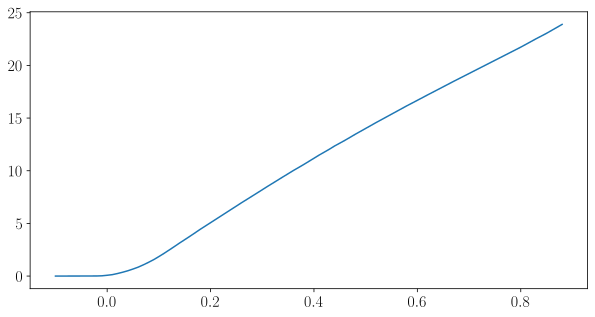